# ********  IPL Dataset Analysis  ********

<img src='https://drive.google.com/uc?id=1DW0D2AfGz4Sgx1Ib7WOerCPH300HpclC' >

https://drive.google.com/uc?id=

In [1]:
# Importing the Useful Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Loading Datatsets.

try:
    df_matches = pd.read_csv('input/matches.csv')
    df_deliveries = pd.read_csv('input/deliveries.csv')
except Exception as e:
    df_matches = pd.read_csv('../input/matches.csv')
    df_deliveries = pd.read_csv('../input/deliveries.csv')   

In [3]:
# Removing the unwanted columns.
try:
    df_matches.drop('umpire3', axis=1, inplace=True)
except Exception as e:
    pass


In [4]:
# Let's checkout the top 5 entries of our Dataset.
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


#### ====================================================================================================

# BAISC ANALYSIS

### Q1). Number of Matches played so far and Number of seasons played so far.

In [5]:
print(f"The Number of matches played so far are:-\t {df_matches.shape[1]}")
print(f"The number of seasons played so far are:-\t {df_matches['season'].nunique()}")

The Number of matches played so far are:-	 17
The number of seasons played so far are:-	 10


### Q2). Number of matches in each season.

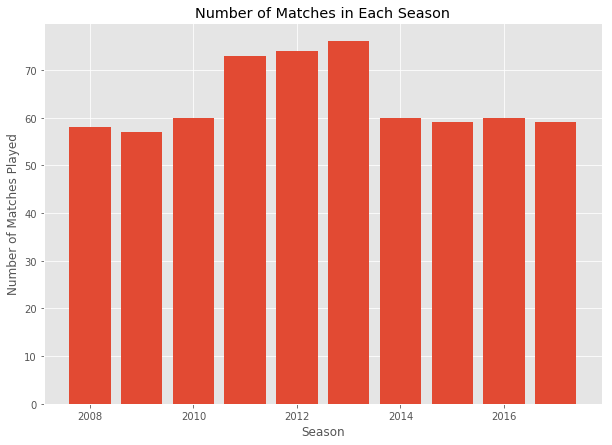

In [6]:
season = df_matches['season'].value_counts()
plt.figure(figsize=(10,7))
plt.bar(x=season.index, height=season.values)
plt.title('Number of Matches in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')
plt.show()

* As one can see maximum number of matches played in 2011, 2012, 2013. This is the time was in very high demand.

#### =====================================================================================================

### Q3). Number of Matches in each Venue.

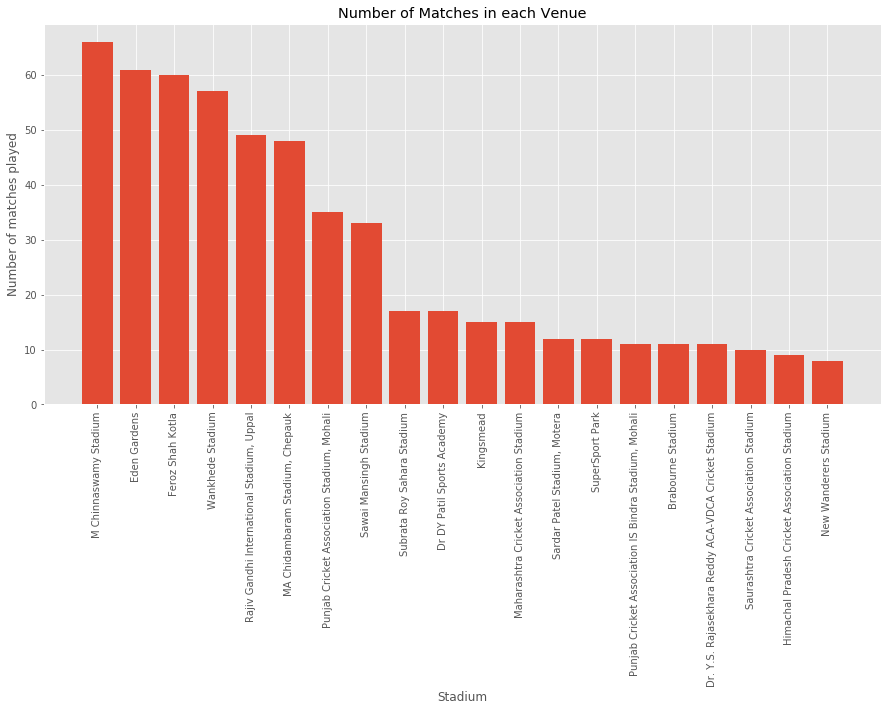

In [7]:
venue = df_matches['venue'].value_counts()[:20]
plt.figure(figsize=(15,7))
plt.bar(x=venue.index, height=venue.values)
plt.title('Number of Matches in each Venue')
plt.xlabel('Stadium')
plt.ylabel('Number of matches played')
plt.xticks(rotation=90)
plt.show()

* The maximum matches played on M Chinnaswamy stadium.
* Other favuorite stadiums are Eden Gardens(Lords of India :p) , Feroz Shah Kotla, Wankhede stadium.

#### =====================================================================================================

### Q4). Number of matches played by each team.

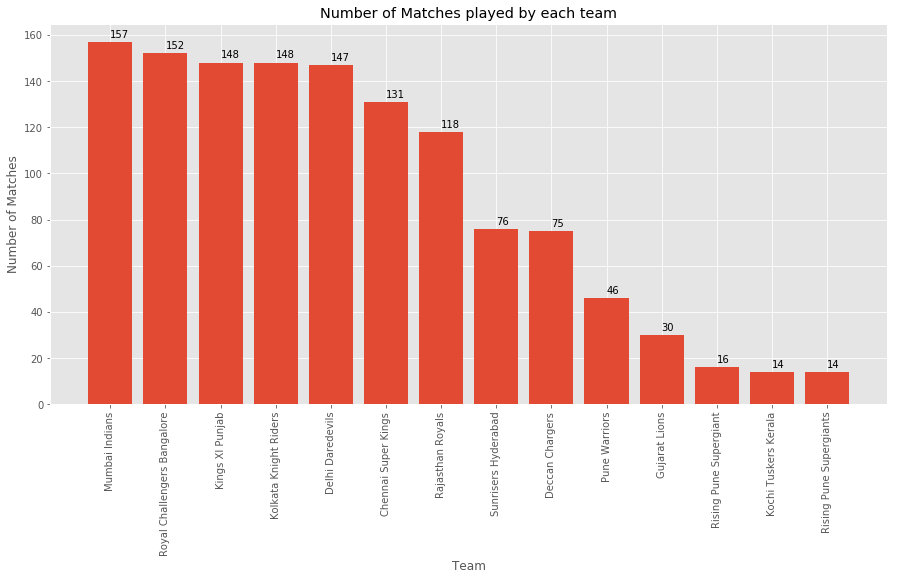

In [74]:
temp_df = pd.concat([df_matches['team1'], df_matches['team2']])

temp_df = temp_df.value_counts()

plt.figure(figsize=(15,7))
plt.bar(x=temp_df.index, height=temp_df.values,)
plt.title('Number of Matches played by each team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)

for i,v in enumerate(temp_df.values):
    plt.text(x=i, y=v+2, s=v)
    
plt.show()    

* Maximum number of matches played by Mumbai Indians, RCB, KKR.

#### ====================================================================================================

### Q5). Number of Total Matches wins per Team.

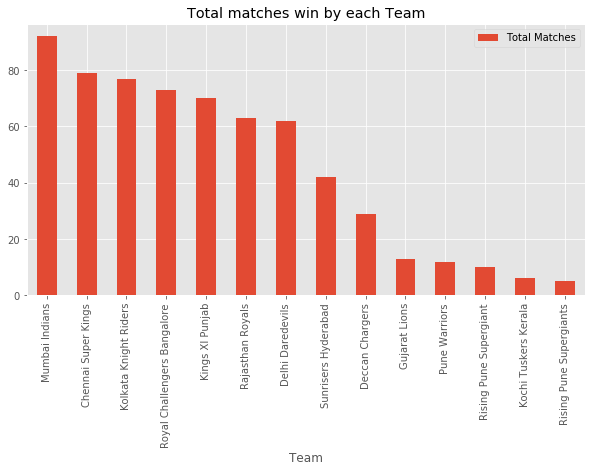

In [84]:
winner = df_matches['winner'].value_counts()
winner = pd.DataFrame(winner)
winner.columns = ['Total Matches']
winner.index.name = 'Team'

winner.plot(kind='bar', figsize=(10,5), title='Total matches win by each Team')
plt.show()



#### The conclusions from figrue:-
* Mumbai Indians leads the total matches won by a team.
* Chennai Super kings,KKR they are also in a race.
* RR and DD they are far behind

#### =====================================================================================================

### Q6). Champion in each season.

In [10]:
temp_df = df_matches.drop_duplicates('season', keep='last')
temp_df = temp_df[['season', 'winner']]
temp_df.sort_values('season',inplace=True)
temp_df.reset_index(inplace=True, drop=True)
temp_df

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


#### ====================================================================================================

### Q7). Number of times each team played final and number of times they won matches.

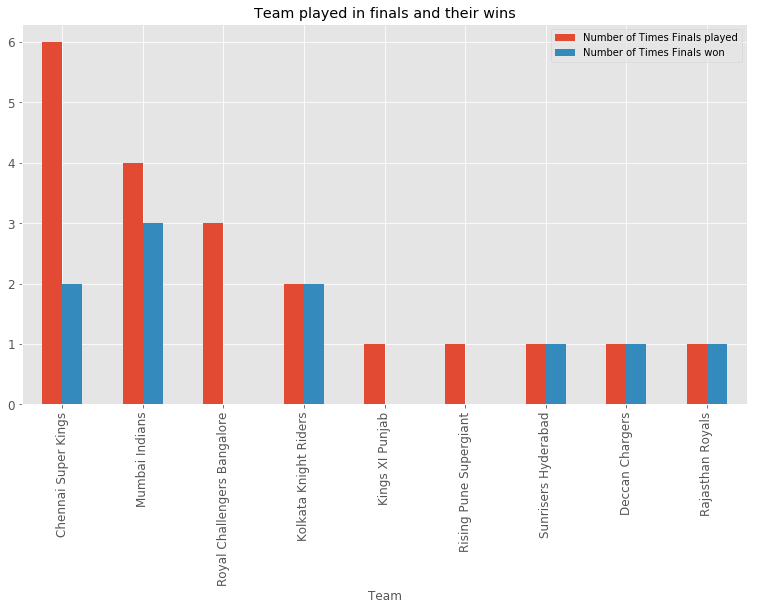

In [11]:
finals = df_matches.drop_duplicates('season', keep='last')
finals = finals[['season', 'team1', 'team2', 'winner', ]]

# Teams who reaches maximum number of finals
most_finals  =pd.concat([finals['team1'], finals['team2']])
most_finals = most_finals.value_counts().reset_index()
most_finals = pd.DataFrame(most_finals)
most_finals.columns = ['Team', 'final_count']

# Teams who won the final.
win_finals = finals['winner'].value_counts().reset_index()
win_finals = pd.DataFrame(win_finals,)

most_finals = most_finals.merge(win_finals, left_on='Team',right_on='index', how='outer')
most_finals.drop('index', axis=1,inplace=True)
most_finals.set_index('Team', drop=True, inplace=True)
most_finals.columns = ['Number of Times Finals played', 'Number of Times Finals won']
most_finals.plot(kind='bar', figsize=(13,7),fontsize=12, title='Team played in finals and their wins')
plt.show()

* Chennai super kings played the maximum number of times 6 in finals. (CSK rocks)
* And Mumbai Indians won 4 seasons, which is the maximum number of times a team won IPL

#### ====================================================================================================

### Q8). Top 10 players who won the maximum number of times , Man of the match title.

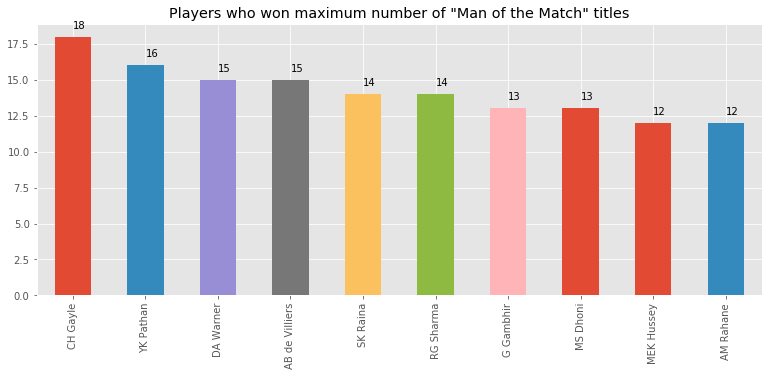

In [12]:
pom = df_matches['player_of_match'].value_counts()[:10]
pom.plot(kind='bar', figsize=(13,5), title='Players who won maximum number of "Man of the Match" titles')
for i,v in enumerate(pom.values):
    plt.text(x=i, y=v+0.6, s=v)

#### The conclusions from the figure:-
* As expected , CH Gayle have maximum number of man of the match titles.  <img src='63839803.jpg' width=200 >
* Till 2017, Virat Kohli is even not in top 10.
* MS Dhoni have won 13 man of the match titles.
* One important thing to notice, YK Pathan have won 16 titles as he is not in top 5 leading run scorers.

#### ====================================================================================================

### Q9). Top 10 Favourite Umpires.

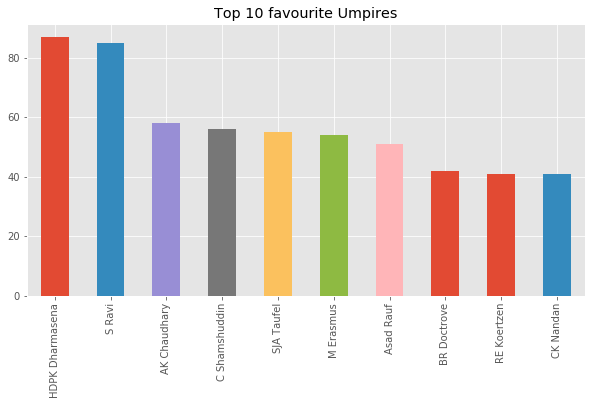

In [13]:
umpire = pd.concat([df_matches['umpire1'], df_matches['umpire2']]).value_counts()[:10]
umpire.plot(kind='bar',title='Top 10 favourite Umpires', figsize=(10,5))
plt.show()

#### ====================================================================================================

### Q10). Top 5 Winner team who defeated the Losser team with the highest number of run Difference.

In [14]:
run_diff = df_matches.sort_values('win_by_runs', ascending=False)[:5]
run_diff[['season', 'team1','team2', 'winner', 'win_by_runs', 'venue']].reset_index(drop=True)

,season,team1,team2,winner,win_by_runs,venue
0,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146,Feroz Shah Kotla
1,2016,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,144,M Chinnaswamy Stadium
2,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,140,M Chinnaswamy Stadium
3,2015,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,138,M Chinnaswamy Stadium
4,2013,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore,130,M Chinnaswamy Stadium


* RCB defeated the rival team 3 times with big margin of runs.


#### ==================================================================================================

### Q11). Top 5 Winner team who defeated the Losser team with the highest number of wickets in their hand.

In [15]:
wicket_max = df_matches.sort_values('win_by_wickets', ascending=False)[:5]
wicket_max[['season', 'team1','team2', 'winner', 'win_by_wickets', 'venue']].reset_index(drop=True)

,season,team1,team2,winner,win_by_wickets,venue
0,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,10,M Chinnaswamy Stadium
1,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,10,Wankhede Stadium
2,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,10,Dr DY Patil Sports Academy
3,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,10,"Punjab Cricket Association IS Bindra Stadium, ..."
4,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,10,Feroz Shah Kotla


* RCB is also there with 2 times win over rival team.
* But unfortunate for RCB they didn't win any Season Title.


#### ====================================================================================================
#### ====================================================================================================


# TOSS ANALYSIS

### Q12).  Toss decision whether Captain choose bat or ball.

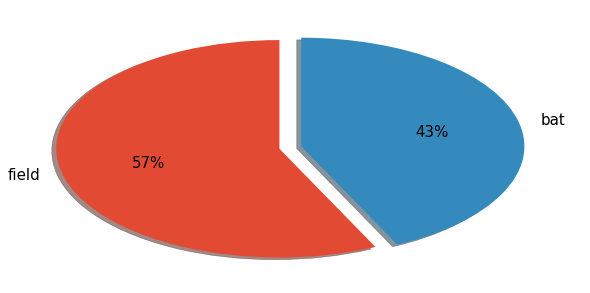

In [16]:
toss_decision = df_matches['toss_decision'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(labels=toss_decision.index, x=toss_decision.values, explode=[0.1,0], autopct='%.f%%',
        shadow=True,startangle=90, textprops={'fontsize':15})
plt.show()

* 57% Captains choose to field first.
* I think they love to chase a target.

#### ====================================================================================================

### Q13). Total Toss won by each team and total matches played by them. 

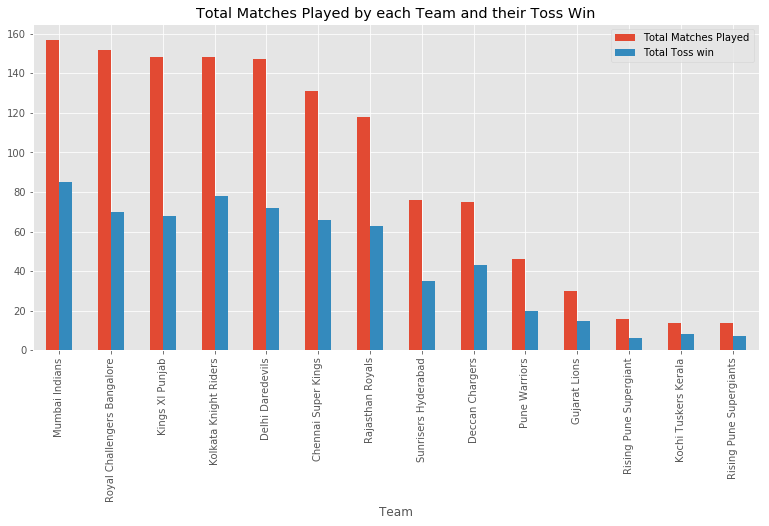

In [17]:

toss_team = pd.concat([df_matches['team1'], df_matches['team2']]).value_counts().reset_index()
toss_team = pd.DataFrame(toss_team)
toss_team.columns = ['Team', 'Total Matches Played']

toss_winner = df_matches['toss_winner'].value_counts().reset_index()
toss_winner = pd.DataFrame(toss_winner)

# merging to DataFrame.
toss_team = toss_team.merge(toss_winner, how='outer', left_on='Team', right_on='index')
toss_team.drop('index', axis=1, inplace=True)
toss_team.columns = ['Team', 'Total Matches Played', 'Total Toss win']

toss_team.set_index('Team', inplace=True)
toss_team.plot(kind='bar', title="""Total Matches Played by each Team and their Toss Win""", figsize=(13,6))
plt.show()

* Mumbai Indian won maximum number of tosses and it played maximum matches also.

#### ====================================================================================================

### Q14). Is toss winner also match winner.

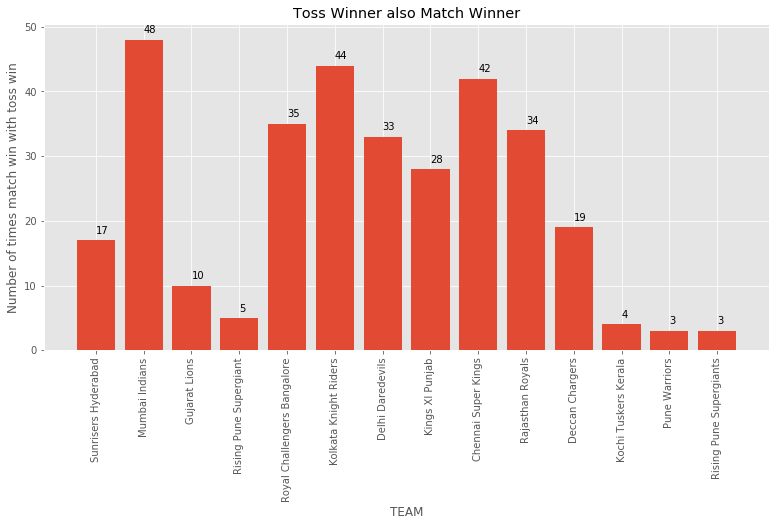

In [18]:
team = df_matches['team1'].unique()

toss_match_winner = []
for var in team:
    count = df_matches[(df_matches['toss_winner'] == var) & (df_matches['winner'] == var)]['id'].count()
    toss_match_winner.append(count)
    
plt.figure(figsize=(13,6))
plt.bar(x=team, height=toss_match_winner)
plt.xticks(rotation=90)
plt.title('Toss Winner also Match Winner')
plt.xlabel('TEAM')
plt.ylabel('Number of times match win with toss win')

for i,v in enumerate(toss_match_winner):   # This is to provide label on bar with their actual value.
    plt.text(x=i, y=v+1, s=v)
plt.show()

* Here also Mumbai Indian leads with 48 matches win with toss win.
* KKR and CSK, they are also not far away from MI. They are at 44, 42 respectively.

#### =====================================================================================================

### Q15). Let's check luck of toss winner who choose bat and won the match. Team Wise Analysis.
###   Toss Winner --->>> Choose Bat --->>>  Won The Match.

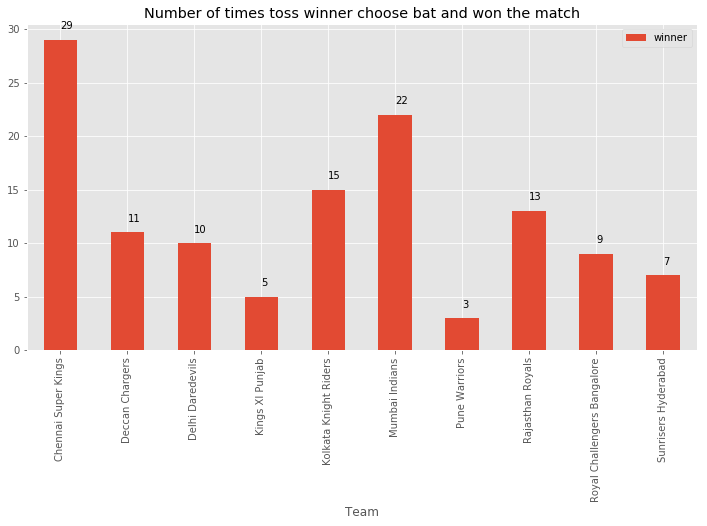

In [43]:
toss_decision_bat = df_matches[df_matches['toss_decision']=='bat']
luck_bat = toss_decision_bat[toss_decision_bat['toss_winner']==toss_decision_bat['winner']].groupby('toss_winner')['winner'].count()
luck_bat = pd.DataFrame(luck_bat)
luck_bat.index.names = ['Team']

luck_bat.plot(kind='bar',title='Number of times toss winner choose bat and won the match', figsize=(12,6), )
for i,v in enumerate(luck_bat['winner'].values):
    plt.text(x=i, y=v+1, s=v)
plt.show()


* CSK top the race followed by MI.
* CSk and MI topped in many number of times in different field.
* So one can say the matches between CSK and MI are vey interesting and full of fun.

#### ====================================================================================================

### Q16).  Let's check luck of toss winner who choose ball and won the match. Team Wise Analysis.
### Toss Winner --->>> Choose Ball --->>> Won The Match.

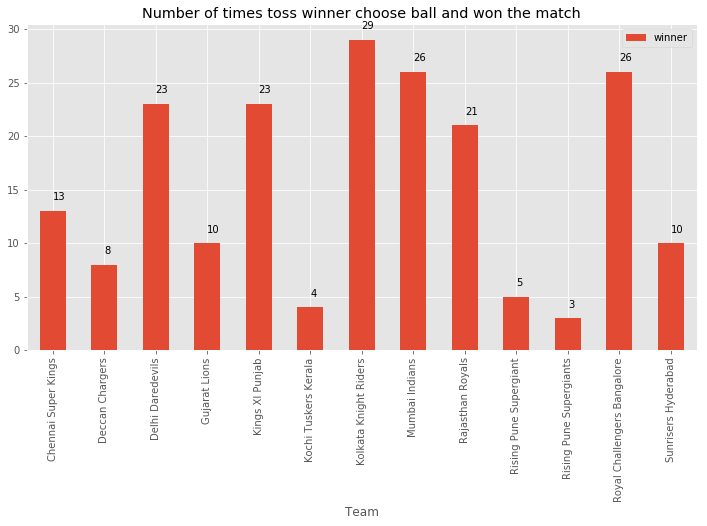

In [45]:
toss_decision_ball = df_matches[df_matches['toss_decision']=='field']
luck_ball = toss_decision_ball[toss_decision_ball['toss_winner']==toss_decision_ball['winner']].groupby('toss_winner')['winner'].count()
luck_ball = pd.DataFrame(luck_ball)
luck_ball.index.names = ['Team']

luck_ball.plot(kind='bar',title='Number of times toss winner choose ball and won the match', figsize=(12,6), )
for i,v in enumerate(luck_ball['winner'].values):
    plt.text(x=i, y=v+1, s=v)
plt.show()

#### The conclusions from figure:-
* Something interesting insights from the figure.
* CSK is no where near to top, it indicates that the chances of winning CSK is more when they choose field if they won the toss.
* RCB and KKR , they should choose field when they won the toss, their probability of winning will increase. RCB has Virat Kohli, The master of Chaser.
* It seems like if MI won toss then they will win match, as it is on top of both figure.

#### =====================================================================================================
#### =====================================================================================================
#### =====================================================================================================

# RUN ANALYSIS 

### Q17). Total runs across each season.

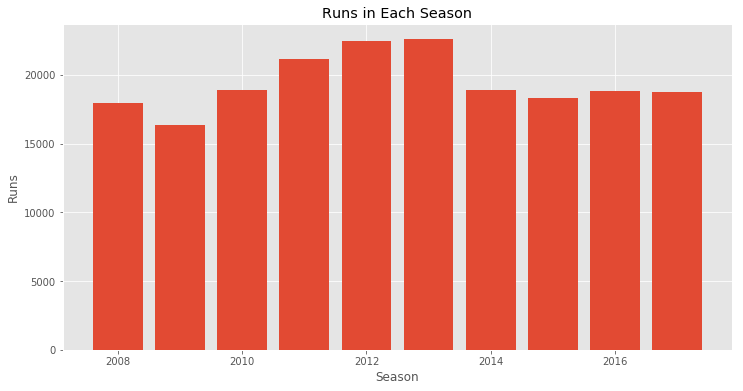

In [68]:

season = df_matches['season'].unique()

# Getting total runs from each season by check id from matches dataset in deliveries dataset.
runs_list = []
for var in season:
    new_df = df_matches[df_matches['season']==var]
    total_runs = 0
    for i in new_df['id'].values:
        run = df_deliveries[df_deliveries['match_id']==i]['total_runs'].sum()
        total_runs+=run
    runs_list.append(total_runs)    
    
plt.figure(figsize=(12,6))
plt.bar(x=season, height=runs_list)
plt.title('Runs in Each Season')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.show()

#### The conclusions from figure:-
* In 2011,2012,2013 more then 20000 runs were made.
* In each Season there were more then 15000 runs.
* This is the reason IPL is so attractive as many runs are made in each Season.

#### ====================================================================================================

### Q18). Sixes and Fours across each season.

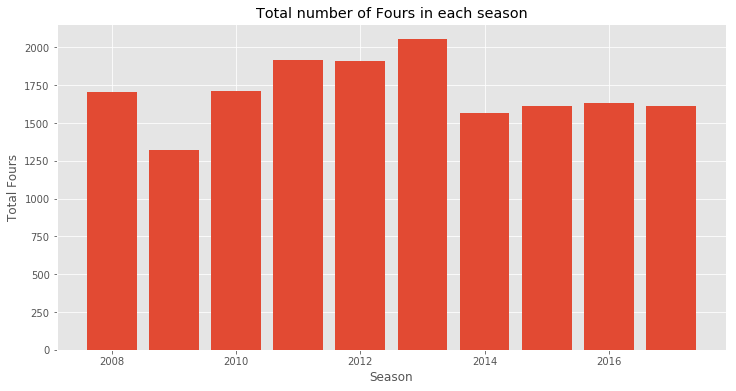

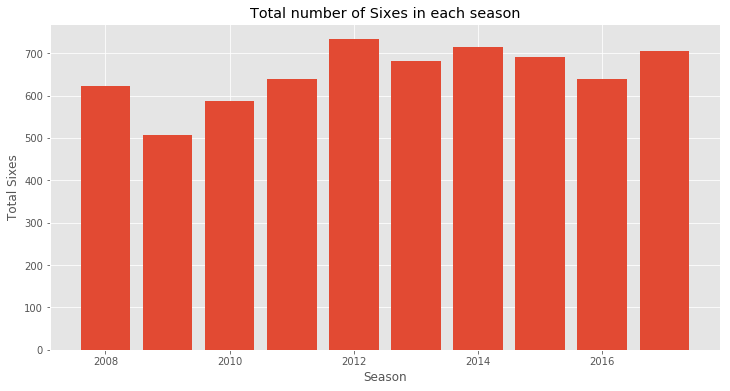

In [92]:
# Fours across each season

season = df_matches['season'].unique()

# Getting total fours from each season by check id from matches dataset in deliveries dataset.
fours_list = []
for var in season:
    new_df = df_matches[df_matches['season']==var]
    total_fours = 0
    for i in new_df['id'].values:
        temp_df = df_deliveries[df_deliveries['match_id']==i]
        fours = temp_df[temp_df['batsman_runs']==4]['batsman_runs'].count()
        total_fours+=fours
    fours_list.append(total_fours)
    
plt.figure(figsize=(12,6), )
plt.bar(x=season, height=fours_list, )
plt.title('Total number of Fours in each season')
plt.xlabel('Season')
plt.ylabel('Total Fours')
plt.show()


# Sixes across each season

season = df_matches['season'].unique()

# Getting total sixes from each season by check id from matches dataset in deliveries dataset.
sixes_list = []
for var in season:
    new_df = df_matches[df_matches['season']==var]
    total_sixes = 0
    for i in new_df['id'].values:
        temp_df = df_deliveries[df_deliveries['match_id']==i]
        sixes = temp_df[temp_df['batsman_runs']==6]['batsman_runs'].count()
        total_sixes+=sixes
    sixes_list.append(total_sixes)
    
plt.figure(figsize=(12,6), )
plt.bar(x=season, height=sixes_list, )
plt.title('Total number of Sixes in each season')
plt.xlabel('Season')
plt.ylabel('Total Sixes')
plt.show()

#### ====================================================================================================

### Q19). Total Runs score by each Team.

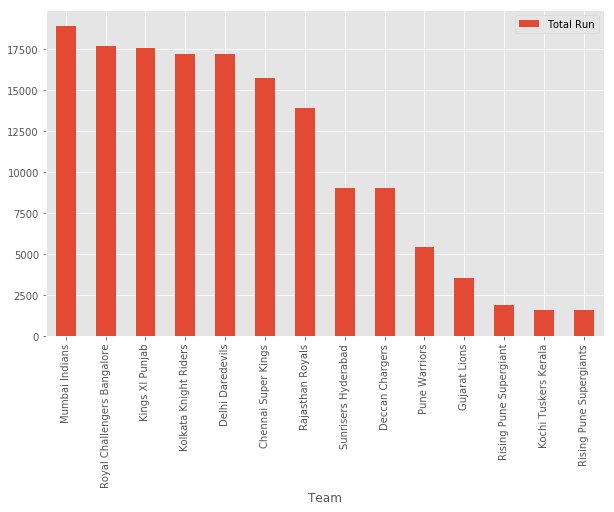

In [102]:
team_runs = df_deliveries.groupby('batting_team')['total_runs'].count()
team_runs = pd.DataFrame(team_runs)
team_runs.index.name = 'Team'
team_runs.columns = ['Total Run']
team_runs.sort_values('Total Run', ascending=False, inplace=True)

team_runs.plot(kind='bar', figsize=(10,6))
plt.show()


* MI topped this list.

#### ====================================================================================================

### Q20). Top 10 Teams who scores Maximum runs in first 5 overs.

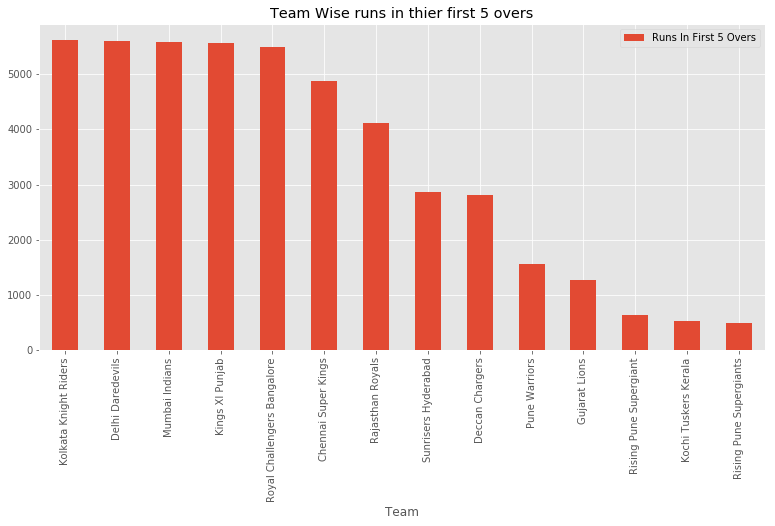

Team,Kolkata Knight Riders,Delhi Daredevils,Mumbai Indians,Kings XI Punjab,Royal Challengers Bangalore,Chennai Super Kings,Rajasthan Royals,Sunrisers Hyderabad,Deccan Chargers,Pune Warriors,Gujarat Lions,Rising Pune Supergiant,Kochi Tuskers Kerala,Rising Pune Supergiants
Runs In First 5 Overs,5623,5596,5580,5567,5490,4874,4111,2862,2819,1567,1265,630,537,491


In [231]:
team = df_deliveries['batting_team'].unique()
team_runs = []
for var in team:
    temp_df = df_deliveries[df_deliveries['batting_team']==var]
    temp_df = temp_df[temp_df['over'].isin([1,2,3,4,5])]
    runs = temp_df['total_runs'].sum()
    team_runs.append(runs)
team = pd.DataFrame(data=team_runs, index=team,columns=['Runs In First 5 Overs'])
team.sort_values('Runs In First 5 Overs', ascending=False, inplace=True)
team.index.name = 'Team'
team.plot(kind='bar', figsize=(13,6), title='Team Wise runs in thier first 5 overs')
plt.show()
team.T

#### ====================================================================================================

### Q21). Top 10 Teams who scores Maximum runs in Last 5 overs.

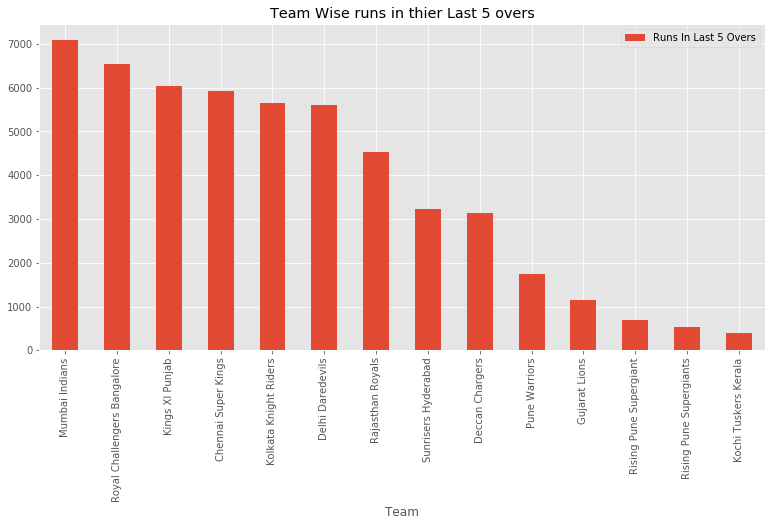

Team,Mumbai Indians,Royal Challengers Bangalore,Kings XI Punjab,Chennai Super Kings,Kolkata Knight Riders,Delhi Daredevils,Rajasthan Royals,Sunrisers Hyderabad,Deccan Chargers,Pune Warriors,Gujarat Lions,Rising Pune Supergiant,Rising Pune Supergiants,Kochi Tuskers Kerala
Runs In Last 5 Overs,7097,6535,6033,5926,5648,5606,4520,3238,3133,1733,1159,681,530,390


In [230]:
team = df_deliveries['batting_team'].unique()
team_runs = []
for var in team:
    temp_df = df_deliveries[df_deliveries['batting_team']==var]
    temp_df = temp_df[temp_df['over'].isin([20,19,18,17,16])]
    runs = temp_df['total_runs'].sum()
    team_runs.append(runs)
team = pd.DataFrame(data=team_runs, index=team,columns=['Runs In Last 5 Overs'])
team.sort_values('Runs In Last 5 Overs', ascending=False, inplace=True)
team.index.name = 'Team'
team.plot(kind='bar', figsize=(13,6), title='Team Wise runs in thier Last 5 overs')
plt.show()
team.T

* MI topped both figures.
* MI has made maximum runs in their first 5 over and in their in last 5 over.

#### =====================================================================================================

### Q22). Runs Distribution by each team in 1st Inning  And 2nd Inning.

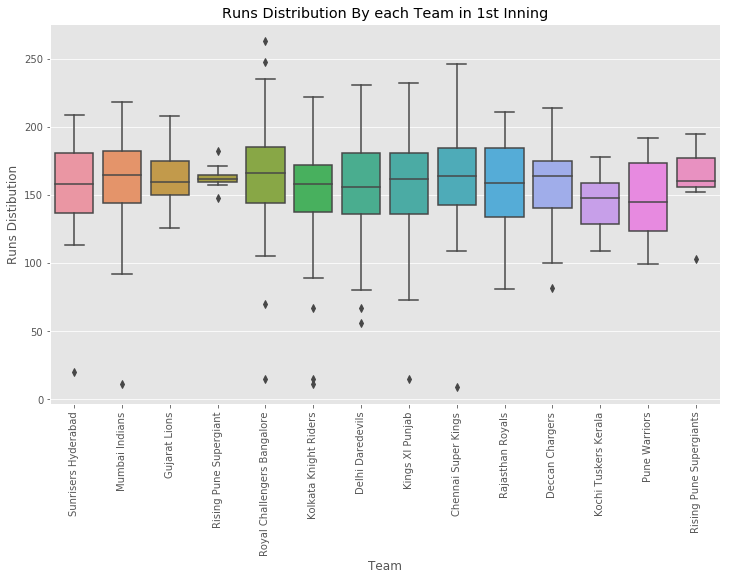

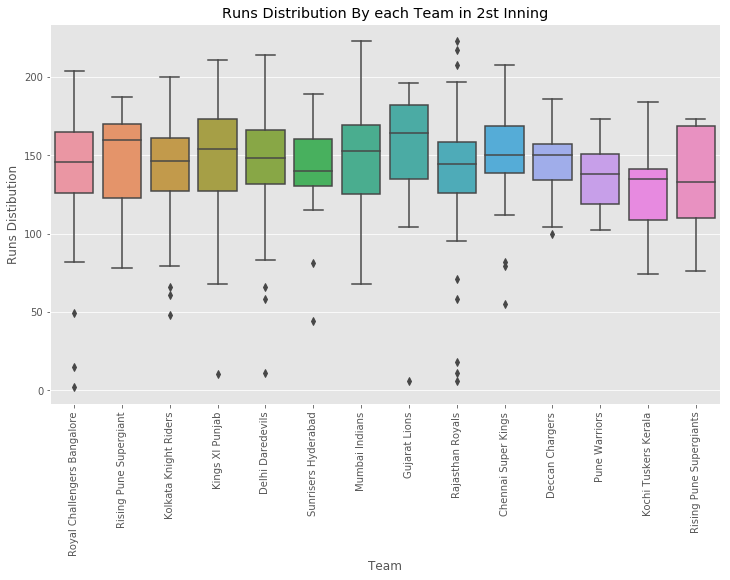

In [146]:
temp_df = df_deliveries.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()
temp_df.drop('match_id', axis=1, inplace=True)

df_1_inning = temp_df[temp_df['inning'].isin([1,3])]
df_2_inning = temp_df[temp_df['inning'].isin([2,4])]

# Plot of runs distribution in 1st Inning.
plt.figure(figsize=(12,7))
sns.boxplot(data=df_1_inning, x=df_1_inning['batting_team'], y=df_1_inning['total_runs'])
plt.xticks(rotation=90)
plt.title('Runs Distribution By each Team in 1st Inning')
plt.ylabel('Runs Distibution')
plt.xlabel('Team')
plt.show()

# Plot of runs distribution in 2nd Inning.
plt.figure(figsize=(12,7))
sns.boxplot(data=df_2_inning, x=df_2_inning['batting_team'], y=df_2_inning['total_runs'])
plt.xticks(rotation=90)
plt.title('Runs Distribution By each Team in 2st Inning')
plt.ylabel('Runs Distibution')
plt.xlabel('Team')
plt.show()

#### The conclusions from graph:-
* It is very difficult to chase a target of 200 runs as in 2nd inning less number of times 200 runs were made as compare to 1st inning.
* In 1st inning RCB is the team which made highest runs and it is also the team which made lowest runs. :p
* RCB is also the team which made lowest runs in 2nd inning.
* MI is best while chasing a target of 200+.
* CSK is the team which set maximum number of times a target of 200+.


#### ====================================================================================================

### Q23). 200+ scores by Top 10 Team.

In [213]:
score_200 = df_deliveries.groupby(['match_id','inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()
score_200.sort_values('total_runs',axis=0, inplace=True, ascending=False)
score_200 = score_200[:10] 
score_200.drop(['match_id','inning'], axis=1, inplace=True)
score_200.columns = ['Batting Team','Bowling Team', '200+ runs']
score_200.reset_index(inplace=True, drop=True)
score_200

,Batting Team,Bowling Team,200+ runs
0,Royal Challengers Bangalore,Pune Warriors,263
1,Royal Challengers Bangalore,Gujarat Lions,248
2,Chennai Super Kings,Rajasthan Royals,246
3,Chennai Super Kings,Kings XI Punjab,240
4,Royal Challengers Bangalore,Mumbai Indians,235
5,Kings XI Punjab,Royal Challengers Bangalore,232
6,Kings XI Punjab,Chennai Super Kings,231
7,Delhi Daredevils,Kings XI Punjab,231
8,Kings XI Punjab,Mumbai Indians,230
9,Royal Challengers Bangalore,Sunrisers Hyderabad,227


* 4 times by RCB, 3 times by Kings Xl Punjabs, 2times by CSk  and 1 times by DD.
* In RCB's 263 runs match Crish Gayle made 175 runs highest by one in IPL.

#### ===================================================================================================

### Q24). Chances of chasing 200+ target.

In [209]:
target_200 = df_deliveries.groupby(['match_id', 'inning', 'batting_team' ])['total_runs'].sum().reset_index()
runs = target_200['total_runs'].values
runs_1st = runs[::2]
runs_2nd = runs[1::2]
win_chase = 0
runs_200 = 0
for i,j in zip(runs_1st, runs_2nd):
    if i>=200:
        runs_200+=1
        if j>i:
            win_chase+=1
    
print(f'The number of times 200+ runs were made:-\t {runs_200}')
print(f'The number of times 200+ target were chased:-\t {win_chase}')
print("""I think there is something wrong with data, as 200+ target were chased more than 4 times.
Or maybe I am wrong somewhere.""")

The number of times 200+ runs were made:-	 38
The number of times 200+ target were chased:-	 4
I think there is something wrong with data, as 200+ target were chased more than 4 times.
Or maybe I am wrong somewhere.


#### ====================================================================================================
#### ====================================================================================================

# BATSMAN ANALYSIS

### Q25). Top 10 Batsman with most number of Fours.

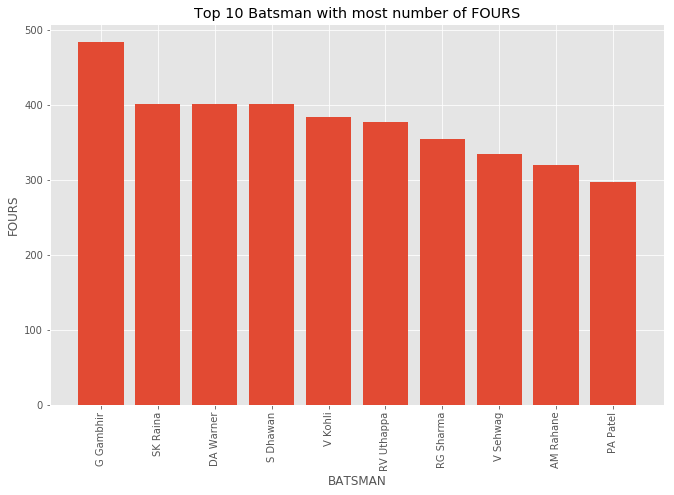

,0,1,2,3,4,5,6,7,8,9
Batsman,G Gambhir,SK Raina,DA Warner,S Dhawan,V Kohli,RV Uthappa,RG Sharma,V Sehwag,AM Rahane,PA Patel
Fours,484,402,401,401,384,377,354,334,320,297


In [229]:
batsman = df_deliveries['batsman'].unique()
count=0
def check_fours(x): # Counting number of fours
    global count
    if x==4:
        count+=1

batsman_fours = []       # This list will contains number of fours of each batsman. 
for var in batsman:
    temp_df = df_deliveries[df_deliveries['batsman']==var]
    temp_df['batsman_runs'].apply(check_fours)
    batsman_fours.append(count)
    count=0


new_df = pd.DataFrame(data={'Batsman':batsman, 'Fours':batsman_fours})
new_df.sort_values('Fours', inplace=True,ascending=False,)
new_df.reset_index(drop=True, inplace=True)
new_df = new_df[:10]
plt.figure(figsize=(11,7))
plt.bar(x=new_df['Batsman'], height=new_df['Fours'])
plt.title('Top 10 Batsman with most number of FOURS')
plt.xlabel('BATSMAN')
plt.ylabel('FOURS')
plt.xticks(rotation=90)
plt.show()
new_df.T


* G Gambhir topped the list with 484 fours followed by SK Raina.
* V Kohli is at 5th position with 384 fours.
* Chrish Gayle is not in the list of top 10 batsman who hits maximum number of sixes.

#### ====================================================================================================

### Q26). Top 10 Batsman with most number of SIXES.

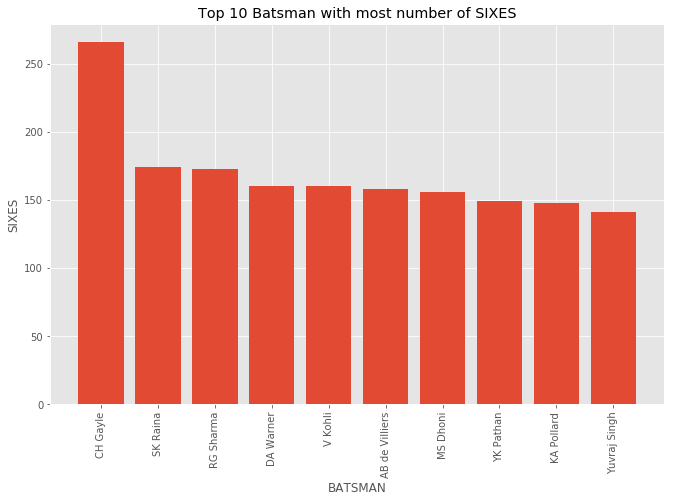

,0,1,2,3,4,5,6,7,8,9
Batsman,CH Gayle,SK Raina,RG Sharma,DA Warner,V Kohli,AB de Villiers,MS Dhoni,YK Pathan,KA Pollard,Yuvraj Singh
Sixes,266,174,173,160,160,158,156,149,148,141


In [232]:
batsman = df_deliveries['batsman'].unique()
count=0
def check_sixes(x):    # COunting number of Sixes.
    global count
    if x==6:
        count+=1

batsman_sixes = []        
for var in batsman:
    temp_df = df_deliveries[df_deliveries['batsman']==var]
    temp_df['batsman_runs'].apply(check_sixes)
    batsman_sixes.append(count)
    count=0


new_df = pd.DataFrame(data={'Batsman':batsman, 'Sixes':batsman_sixes})
new_df.sort_values('Sixes', inplace=True,ascending=False,)
new_df.reset_index(drop=True, inplace=True)
new_df = new_df[:10]
plt.figure(figsize=(11,7))
plt.bar(x=new_df['Batsman'], height=new_df['Sixes'])
plt.title('Top 10 Batsman with most number of SIXES')
plt.xlabel('BATSMAN')
plt.ylabel('SIXES')
plt.xticks(rotation=90)
plt.show()
new_df.T


* CH Gayle, as expected, topped the list.
* V Kohli is at 5th postion here also, as he is at same position in maximum number of fours hit by batsman. It indicates his consistency is far better than other batsman.
* MS Dhoni hits 156 sixes.

#### ====================================================================================================

### Q27). Top 10 Batsman with most number of dot balls.

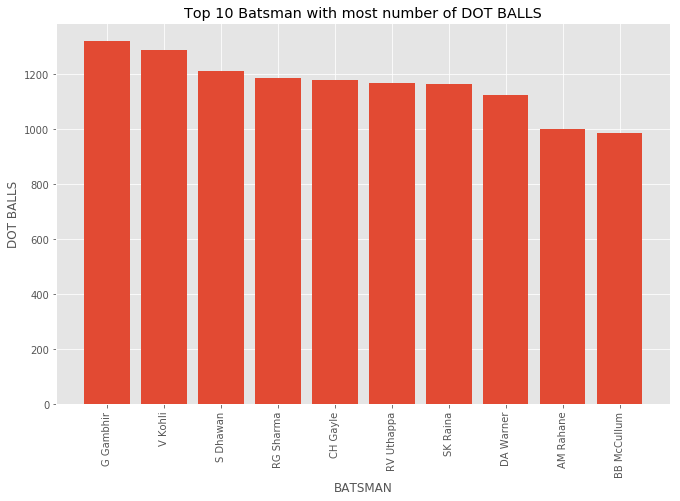

,0,1,2,3,4,5,6,7,8,9
Batsman,G Gambhir,V Kohli,S Dhawan,RG Sharma,CH Gayle,RV Uthappa,SK Raina,DA Warner,AM Rahane,BB McCullum
Dot Balls,1318,1287,1210,1185,1178,1165,1163,1124,1001,985


In [234]:
batsman = df_deliveries['batsman'].unique()
count=0
def check_dot(x):    # COunting number of Dot balls.
    global count
    if x==0:
        count+=1

batsman_dot = []        
for var in batsman:
    temp_df = df_deliveries[df_deliveries['batsman']==var]
    temp_df['batsman_runs'].apply(check_dot)
    batsman_dot.append(count)
    count=0


new_df = pd.DataFrame(data={'Batsman':batsman, 'Dot Balls':batsman_dot})
new_df.sort_values('Dot Balls', inplace=True,ascending=False,)
new_df.reset_index(drop=True, inplace=True)
new_df = new_df[:10]
plt.figure(figsize=(11,7))
plt.bar(x=new_df['Batsman'], height=new_df['Dot Balls'])
plt.title('Top 10 Batsman with most number of DOT BALLS')
plt.xlabel('BATSMAN')
plt.ylabel('DOT BALLS')
plt.xticks(rotation=90)
plt.show()
new_df.T

#### ====================================================================================================

### Q28). Top 10 Individuals Scores.


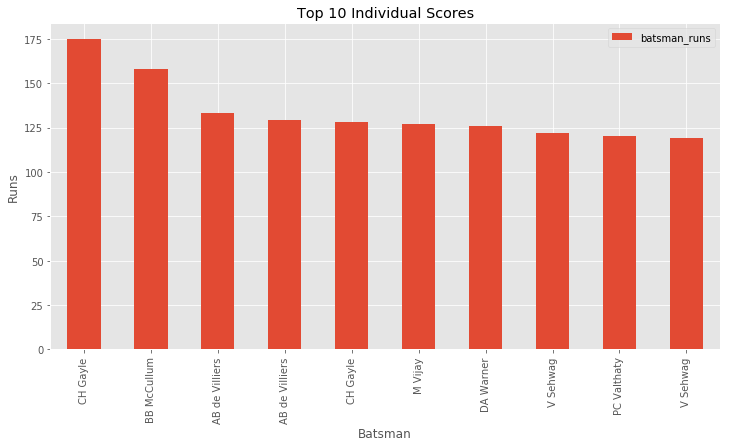

batsman,CH Gayle,BB McCullum,AB de Villiers,AB de Villiers,CH Gayle,M Vijay,DA Warner,V Sehwag,PC Valthaty,V Sehwag
batsman_runs,175,158,133,129,128,127,126,122,120,119


In [251]:
#Runs by Individual in each match.

individual = df_deliveries.groupby(['match_id','batsman',])['batsman_runs'].sum().reset_index()
individual.sort_values('batsman_runs',axis=0, inplace=True,ascending=False)

# Top 10 highest runs by Individual.
individual = individual[:10]

individual.drop('match_id',inplace=True,axis=1)
individual.set_index('batsman',inplace=True)

individual.plot(kind='bar', figsize=(12,6))
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.title('Top 10 Individual Scores')
plt.show()
individual.T

* The day Chrish Gayle hit 175 runs.
* Amazing Experienced.

#### ====================================================================================================

### Q29). Orange Cap holder (Highest runs by Individual) in each Season.

In [252]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [253]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [273]:
season = df_matches['season'].unique()

# Getting total runs of Individual from each season by check id from matches dataset in deliveries dataset.
name,runs = [],[]
for var in season:
    new_df = df_matches[df_matches['season']==var]
    temp_df = df_deliveries[df_deliveries['match_id'].isin(new_df['id'].values)]
    temp_df = temp_df.groupby('batsman')['batsman_runs'].sum().reset_index()
    temp_df.sort_values('batsman_runs', inplace=True,ascending=False)
    temp_df = temp_df.iloc[0,:]
    name.append(temp_df['batsman'])
    runs.append(temp_df['batsman_runs'])

orange_df = pd.DataFrame(data={'Season':season, 'Player':name, 'Total Runs':runs})
orange_df.sort_values('Season')

,Season,Player,Total Runs
1,2008,SE Marsh,616
2,2009,ML Hayden,572
3,2010,SR Tendulkar,618
4,2011,CH Gayle,608
5,2012,CH Gayle,733
6,2013,MEK Hussey,733
7,2014,RV Uthappa,660
8,2015,DA Warner,562
9,2016,V Kohli,973
0,2017,DA Warner,641


#### ====================================================================================================

# BOWLER ANALYSIS

### Q30). Purple cap holder (highest wicket taker)  in each Season.

In [308]:
season = df_matches['season'].unique()

# Getting total wickets of Individual from each season by check id from matches dataset in deliveries dataset.
name,wickets = [],[]

q = df_deliveries['dismissal_kind'].unique()
out = ['caught', 'bowled', 'lbw', 'caught and bowled',  'stumped', 'hit wicket']

for var in season:
    new_df = df_matches[df_matches['season']==var]
    
    temp_df = df_deliveries[df_deliveries['match_id'].isin(new_df['id'].values)]
    temp_df = temp_df[temp_df['dismissal_kind'].isin(out)]
    temp_df = temp_df.groupby('bowler')['dismissal_kind'].count().reset_index()
    
    temp_df.sort_values('dismissal_kind', inplace=True,ascending=False)
    temp_df = temp_df.iloc[0,:]
   
    name.append(temp_df['bowler'])
    wickets.append(temp_df['dismissal_kind'])

purple_df = pd.DataFrame(data={'Season':season, 'Bowler':name, 'Wickets':wickets})
purple_df.sort_values('Season')

,Season,Bowler,Wickets
1,2008,Sohail Tanvir,22
2,2009,RP Singh,23
3,2010,PP Ojha,21
4,2011,SL Malinga,28
5,2012,M Morkel,25
6,2013,DJ Bravo,32
7,2014,MM Sharma,23
8,2015,DJ Bravo,26
9,2016,B Kumar,23
0,2017,B Kumar,26


* Dj Bravo and B Kumar(bhuvi) were two times purple cap holder.

#### ====================================================================================================

### Q31). Most Comman dismissal Type.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

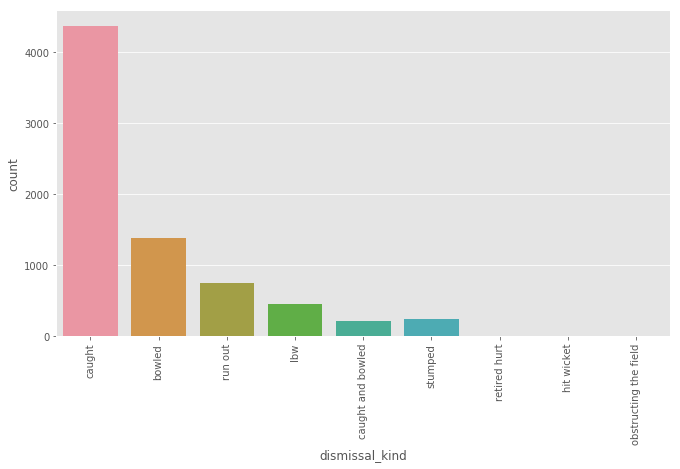

In [313]:
plt.figure(figsize=(11,6))
sns.countplot(data=df_deliveries, x='dismissal_kind')
plt.xticks(rotation=90)

#### =====================================================================================================

### Q32). Top 10 Highest Wickets Taker.

In [322]:
out = ['caught', 'bowled', 'lbw', 'caught and bowled',  'stumped', 'hit wicket']
wickets_taker = df_deliveries[df_deliveries['dismissal_kind'].isin(out)]
wickets_taker = wickets_taker.groupby('bowler')['dismissal_kind'].count().reset_index()
wickets_taker.sort_values('dismissal_kind', ascending=False, inplace=True)
wickets_taker.reset_index(drop=True, inplace=True)
wickets_taker[:10].T

,0,1,2,3,4,5,6,7,8,9
bowler,SL Malinga,A Mishra,Harbhajan Singh,PP Chawla,DJ Bravo,B Kumar,A Nehra,R Vinay Kumar,Z Khan,R Ashwin
dismissal_kind,154,134,127,126,122,111,106,103,102,100


#### ====================================================================================================

### Q33).  Top 10 Bowler who bowled Maximum bowls in IPL.

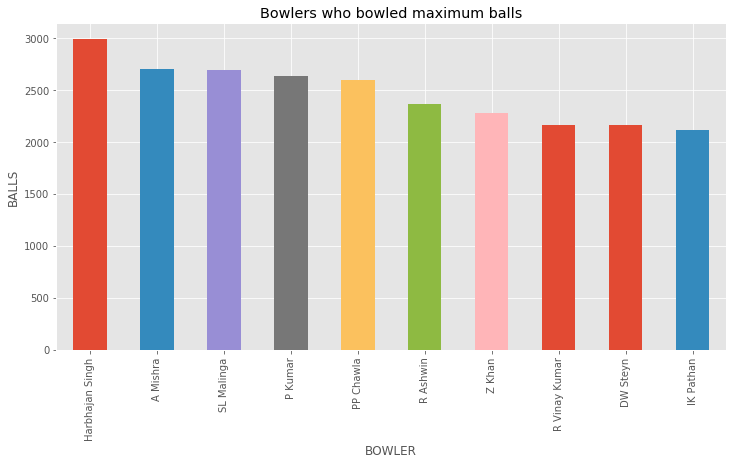

,Harbhajan Singh,A Mishra,SL Malinga,P Kumar,PP Chawla,R Ashwin,Z Khan,R Vinay Kumar,DW Steyn,IK Pathan
bowler,2989,2703,2694,2637,2594,2359,2276,2161,2159,2113


In [335]:
balls = df_deliveries['bowler'].value_counts()[:10]
balls.plot(kind='bar', title='Bowlers who bowled maximum balls', figsize=(12,6))
plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()
balls = pd.DataFrame(balls)
balls.T

#### =====================================================================================================

### Q34). Top 10 Bowlers with maximum number of Dot Balls.

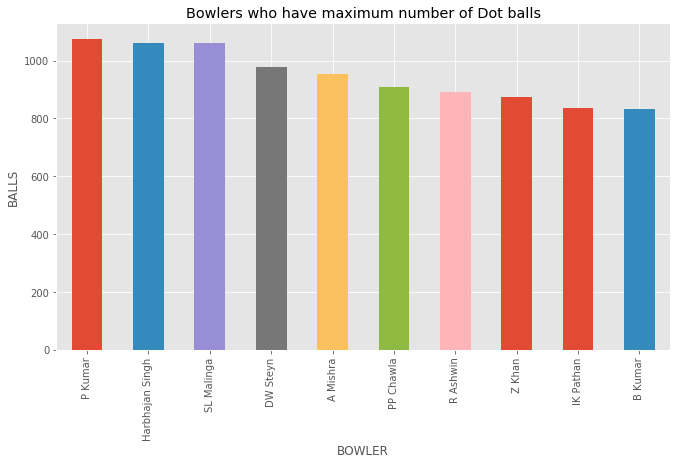

,P Kumar,Harbhajan Singh,SL Malinga,DW Steyn,A Mishra,PP Chawla,R Ashwin,Z Khan,IK Pathan,B Kumar
bowler,1075,1062,1060,978,953,910,891,873,835,832


In [338]:
dot_ball = df_deliveries[df_deliveries['total_runs']==0]
dot_ball = dot_ball['bowler'].value_counts()[:10]
dot_ball.plot(kind='bar', figsize=(11,6), title='Bowlers who have maximum number of Dot balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

dot_ball = pd.DataFrame(dot_ball)
dot_ball.T


#### ===================================================================================================

### Q35).  Top 10 Bowlers with maximum number of extras.

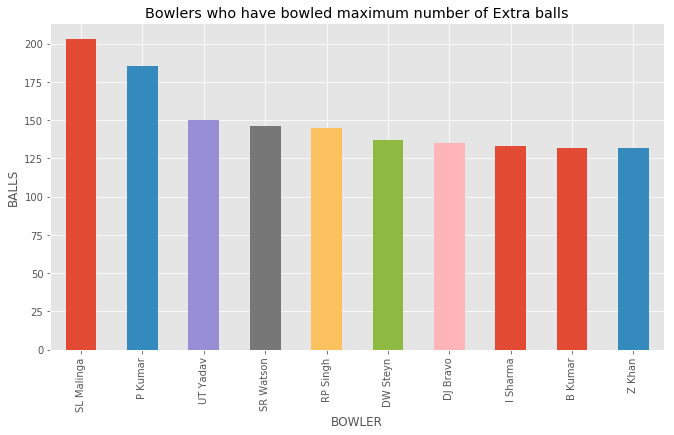

,SL Malinga,P Kumar,UT Yadav,SR Watson,RP Singh,DW Steyn,DJ Bravo,I Sharma,B Kumar,Z Khan
bowler,203,185,150,146,145,137,135,133,132,132


In [342]:
extra = df_deliveries[df_deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T

#### ====================================================================================================
#### ====================================================================================================
#### ====================================================================================================